# Introduction to CNN and Computer vision with TensorFlow



## Get the data

The image we're working with are from the FOod101 dataset (101 different classes fo food)

However we've modified it to only use two classes (pizza & steak)

In [1]:
import requests
import zipfile
import os

# Download the file
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
local_zip = "pizza_steak.zip"
with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(local_zip, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

# Extract the downloaded ZIP file
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(".")

# Clean up by removing the zip file
os.remove(local_zip)


## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data .

And for a computer vision project... this usually means visualizing many samples of you data.

In [2]:
!dir pizza_steak

 Volume in drive E is DATA
 Volume Serial Number is D0A1-2887

 Directory of e:\CPE\1-2567\Project\AI\pizza_steak

08/21/2024  10:58 PM    <DIR>          .
08/22/2024  04:01 AM    <DIR>          ..
08/21/2024  10:58 PM    <DIR>          test
08/21/2024  10:58 PM    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  309,200,154,624 bytes free


In [3]:
!dir pizza_steak\train\

 Volume in drive E is DATA
 Volume Serial Number is D0A1-2887

 Directory of e:\CPE\1-2567\Project\AI\pizza_steak\train

08/21/2024  10:58 PM    <DIR>          .
08/21/2024  10:58 PM    <DIR>          ..
08/21/2024  10:58 PM    <DIR>          pizza
08/21/2024  10:58 PM    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  309,200,154,624 bytes free


In [4]:
!dir pizza_steak\train\steak

 Volume in drive E is DATA
 Volume Serial Number is D0A1-2887

 Directory of e:\CPE\1-2567\Project\AI\pizza_steak\train\steak

08/21/2024  10:58 PM    <DIR>          .
08/21/2024  10:58 PM    <DIR>          ..
08/22/2024  04:01 AM            36,185 1000205.jpg
08/22/2024  04:01 AM            34,497 100135.jpg
08/22/2024  04:01 AM           116,802 101312.jpg
08/22/2024  04:01 AM            56,754 1021458.jpg
08/22/2024  04:01 AM            34,143 1032846.jpg
08/22/2024  04:01 AM            24,688 10380.jpg
08/22/2024  04:01 AM            37,134 1049459.jpg
08/22/2024  04:01 AM            49,841 1053665.jpg
08/22/2024  04:01 AM            59,983 1068516.jpg
08/22/2024  04:01 AM            28,996 1068975.jpg
08/22/2024  04:01 AM            29,525 1081258.jpg
08/22/2024  04:01 AM            49,577 1090122.jpg
08/22/2024  04:01 AM            59,976 1093966.jpg
08/22/2024  04:01 AM            60,253 1098844.jpg
08/22/2024  04:01 AM            69,843 1100074.jpg
08/22/2024  04:01 AM         

In [5]:
import os
# Wlak through pizza_steak directory and list number os files
for dirpath, dirname , filename in os.walk("pizza_steak"):
    print(f'There are {len(dirname)} directories and {len(filename)} images in "{dirpath}".')

There are 2 directories and 0 images in "pizza_steak".
There are 2 directories and 0 images in "pizza_steak\test".
There are 0 directories and 250 images in "pizza_steak\test\pizza".
There are 0 directories and 250 images in "pizza_steak\test\steak".
There are 2 directories and 0 images in "pizza_steak\train".
There are 0 directories and 750 images in "pizza_steak\train\pizza".
There are 0 directories and 750 images in "pizza_steak\train\steak".


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our image, first let's get the class names programmatically.

In [7]:
# Get the classname programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list fo class_name from the subdir 
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    # Set up the target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)
    
    # Get a list of all image file names in the target directory
    image_files = os.listdir(target_folder)
    
    # Ensure there are images in the folder
    if not image_files:
        raise ValueError(f"No images found in the directory: {target_folder}")
    
    # Get a random image path
    random_image = random.choice(image_files)
    image_path = os.path.join(target_folder, random_image)
    print(f"Loading image: {image_path}")
    
    # Read in the image and plot it using matplotlib 
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}")
    return img
    




Loading image: pizza_steak/train/steak\513842.jpg
Image shape: (512, 512, 3)


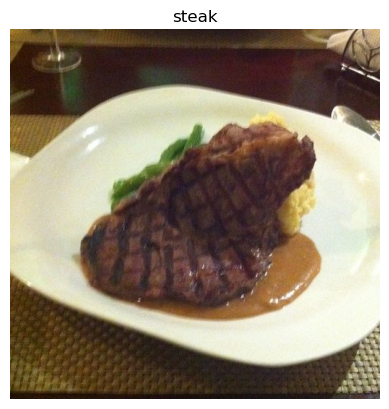

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
# Convert the image to a TensorFlow tensor
import tensorflow as tf
tf.constant(img)


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[166, 129,  51],
        [150, 114,  36],
        [146, 110,  32],
        ...,
        [214, 183, 137],
        [208, 177, 133],
        [210, 178, 137]],

       [[160, 123,  45],
        [161, 124,  46],
        [161, 125,  47],
        ...,
        [211, 180, 134],
        [211, 180, 136],
        [214, 182, 141]],

       [[165, 128,  50],
        [167, 130,  52],
        [169, 132,  54],
        ...,
        [226, 195, 148],
        [214, 183, 137],
        [204, 173, 129]],

       ...,

       [[ 41,  23,  11],
        [ 33,  17,   4],
        [ 29,  13,   0],
        ...,
        [ 80,  73,  80],
        [ 94,  89,  96],
        [104,  99, 106]],

       [[ 36,  20,   7],
        [ 37,  21,   8],
        [ 36,  20,   7],
        ...,
        [ 87,  82,  89],
        [100,  94, 104],
        [108, 102, 112]],

       [[ 28,  12,   0],
        [ 38,  22,   9],
        [ 42,  26,  13],
        ...,
        [ 88,  83,  9

In [11]:
img.shape

(512, 512, 3)

In [12]:
# Get all the pixel values between 0&1
img/255.

array([[[0.65098039, 0.50588235, 0.2       ],
        [0.58823529, 0.44705882, 0.14117647],
        [0.57254902, 0.43137255, 0.1254902 ],
        ...,
        [0.83921569, 0.71764706, 0.5372549 ],
        [0.81568627, 0.69411765, 0.52156863],
        [0.82352941, 0.69803922, 0.5372549 ]],

       [[0.62745098, 0.48235294, 0.17647059],
        [0.63137255, 0.48627451, 0.18039216],
        [0.63137255, 0.49019608, 0.18431373],
        ...,
        [0.82745098, 0.70588235, 0.5254902 ],
        [0.82745098, 0.70588235, 0.53333333],
        [0.83921569, 0.71372549, 0.55294118]],

       [[0.64705882, 0.50196078, 0.19607843],
        [0.65490196, 0.50980392, 0.20392157],
        [0.6627451 , 0.51764706, 0.21176471],
        ...,
        [0.88627451, 0.76470588, 0.58039216],
        [0.83921569, 0.71764706, 0.5372549 ],
        [0.8       , 0.67843137, 0.50588235]],

       ...,

       [[0.16078431, 0.09019608, 0.04313725],
        [0.12941176, 0.06666667, 0.01568627],
        [0.11372549, 0

## An end-to-end example

Let's build a CNN to find pattern in our images , more specifically we need a way to :

* Load our images
* Preprocess our images 
* Build a CNN to find pattern in pur images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1 , also called scaling/normalizations)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up path to our data dir
train_dir = "E:/CPE/1-2567/Project/AI/pizza_steak/train"
test_dir = "E:/CPE/1-2567/Project/AI/pizza_steak/test"

#batch_size=32 ,
# Import data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=500 ,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=500 ,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model1_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN 
model1_1.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model1_1.fit(train_data,
                       epochs=30,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/30
3/3 [==============================] - 52s 8s/step - loss: 0.7686 - accuracy: 0.5473 - val_loss: 0.8239 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 7s 3s/step - loss: 0.7440 - accuracy: 0.5233 - val_loss: 0.6348 - val_accuracy: 0.6880
Epoch 3/30
3/3 [==============================] - 8s 3s/step - loss: 0.6600 - accuracy: 0.5820 - val_loss: 0.6532 - val_accuracy: 0.5280
Epoch 4/30
3/3 [==============================] - 8s 3s/step - loss: 0.6515 - accuracy: 0.6187 - val_loss: 0.6450 - val_accuracy: 0.6600
Epoch 5/30
3/3 [==============================] - 7s 3s/step - loss: 0.6336 - accuracy: 0.7040 - val_loss: 0.6050 - val_accuracy: 0.6980
Epoch 6/30
3/3 [==============================] - 7s 3s/step - loss: 0.6035 - accuracy: 0.7087 - val_loss: 0.5730 - val_accuracy: 0.7440
Epoch 7/30
3/3 [==============================] - 8s 3s/step - loss: 0.5665 - accuracy: 0.7553

> **Note:** If the above cell is taking longer than `10 sec. per epoch, make sure you're using GPU  

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1 , also called scaling/normalizations)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up path to our data dir
train_dir = "E:/CPE/1-2567/Project/AI/pizza_steak/train"
test_dir = "E:/CPE/1-2567/Project/AI/pizza_steak/test"

#batch_size=32 ,
# Import data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32 ,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32 ,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model1_0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN 
model1_0.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model1_0.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 166ms/step - loss: 0.6797 - accuracy: 0.5047 - val_loss: 0.6280 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 7s 153ms/step - loss: 0.5383 - accuracy: 0.7140 - val_loss: 0.4722 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 7s 153ms/step - loss: 0.4869 - accuracy: 0.7880 - val_loss: 0.4833 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 7s 151ms/step - loss: 0.4318 - accuracy: 0.8013 - val_loss: 0.4429 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 7s 151ms/step - loss: 0.3917 - accuracy: 0.8347 - val_loss: 0.3681 - val_accuracy: 0.8600


In [22]:
model1_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [23]:
model1_0.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Using the same model as before 

Let's replicate the model we've build prev. to see if it work on our image data

In [24]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 178ms/step - loss: 0.7005 - accuracy: 0.4653 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [25]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 4)                 602116    
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model1_1),
model_2 performs terribly... let's try to improve it.

In [30]:
# Set the random seed
tf.random.set_seed(42)

model_3 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 180ms/step - loss: 2.8985 - accuracy: 0.6167 - val_loss: 0.5246 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6039 - accuracy: 0.7300 - val_loss: 0.5682 - val_accuracy: 0.6980
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.5874 - accuracy: 0.7493 - val_loss: 0.6894 - val_accuracy: 0.6980
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.5370 - accuracy: 0.7693 - val_loss: 0.6027 - val_accuracy: 0.6540
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.5241 - accuracy: 0.7633 - val_loss: 0.5776 - val_accuracy: 0.7440


In [31]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 100)               15052900  
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classifications: Let's break it down

1. Become one with the data (visualize ,visualize ,visualize)
2. Prepreocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Create a model (start with baseline)
4. Fit the model
5. Evaluate the model (check the performance)
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (Experiment ,Experiment ,Experiment)

### 1. Become one with the data

Loading image: pizza_steak/train/steak\1945132.jpg
Image shape: (384, 512, 3)
Loading image: pizza_steak/train/pizza\2587918.jpg
Image shape: (512, 512, 3)


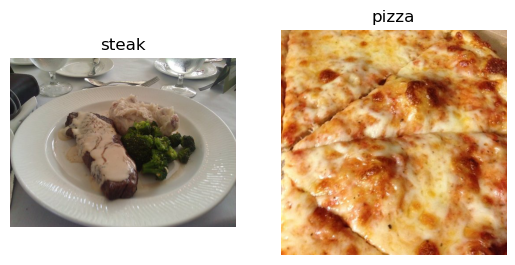

In [37]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Prepreocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "E:/CPE/1-2567/Project/AI/pizza_steak/train/"
test_dir = "E:/CPE/1-2567/Project/AI/pizza_steak/test/"

Our next step is turn our data into **batches.**

A batches is a small subset of data. Rather than look at all ~10,000 images at one time, a model only look at 32 at a time.

It does this for couple reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Try to learn the pattern in 10,000 images in one hit could result in the model not being able to learn very well.



In [39]:
!nvidia-smi

Thu Aug 22 06:17:29 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.81                 Driver Version: 560.81         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070      WDDM  |   00000000:08:00.0  On |                  N/A |
| 57%   46C    P8             27W /  224W |    7768MiB /   8192MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [43]:
# Create train and test the data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [44]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [46]:
# get a sample of a training data batch
images , labels = train_data.next()
len(images) , len(labels)

(32, 32)